# Transformada de Laplace

## Definición

Es una función matemática que utilizaremos para transformar señales en el dominio temporal a un dominio de frecuencia generalizada, que llamaremos dominio transformado de *Laplace*.

La transformada de Laplace se define como

$$F(s) = \mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{dt}$$

donde $s$ es una variable compleja $s = \sigma + j\omega$.

## Antitransformada de Laplace

Se puede demostrar que teniendo la función transformada $F(s)$, se puede recuperar la función en el dominio temporal $f(t)$ aplicando la antitransformada de Laplace:

$$f(t)=\mathcal{L}^{-1}\{F(s)\} =\frac{1}{2\pi j} \int_{\sigma-j\omega}^{\sigma+j\omega} F(s) e^{st} ds .$$

:::{figure-md} tabla-transformadas

<img style="display:block; margin-left: auto; margin-right: auto;" src="bg2.png" width="600px" alt="Tabla de transformadas de Laplace">

Tabla de transformas de Laplace

:::

## Propiedades de la Transformada de Laplace

- **Linealidad**: $\mathcal{L}\{kf(t)\} = k F(s)$; $\mathcal{L}\{f_1(t)+f_2(t)\} = F_1(s)+F_2(s)$
- **Corrimiento en frecuencia**: $\mathcal{L}\{e^{-at}f(t)\}=F(s+a)$
- **Corrimiento en el tiempo**: $\mathcal{L}\{f(t-T)\}=e^{-sT}F(s)$
- **Escaleo Temporal**: $\mathcal{L}\{f(at)\}=\dfrac{1}{a}e^{-sT}F\left(\dfrac{s}{a}\right)$

- **Derivada**: $\mathcal{L}\left\{\dfrac{df(t)}{dt}\right\}=sF(s)-f(0)$
- **Derivada segunda**: $\mathcal{L} \left\{ \dfrac{d^2f(t)}{dt^2} \right\}=s^2F(s)-sf(0)-f'(0);$
- **Derivada de orden n**: $\mathcal{L} \left\{ \dfrac{d^nf(t)}{dt^n} \right\}= s^n F(s)- s^{n-1}f(0) - s^{n-2}f'(0) - \ldots - sf^{n-2}(0)-f^{n-1}(0)$
- **Integral**: $\mathcal{L} \left\{ \int_0^tf(\tau)d\tau \right\} =\dfrac{F(s)}{s}$
- **Teorema de valor final**: $f(\infty)=\lim_{s\rightarrow 0}sF(s)$
- **Teorema de valor inicial**: $f(0)=\lim_{s\rightarrow \infty}sF(s)$

El **teorema del valor final** lo estaremos usando en las próximas clases para analizar que sucede con la salida de cun sistema luego de un tiempo muy largo (infinito).

## Cálculo de la transformada de Laplace mediante SymPy

Durante el transcurso de este curso utilizaremos las tablas para las obtener la transformada y antitransformada de Laplace. Sin embargo, aquí se presenta como material adicional para quien le interese, la forma de obtener estas funciones mediante el uso de `SymPy`

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Vamos a definir algunos símbolos para trabajar. Aquí usamos `Symbol` para poder especificar los dominios y las restricciones en los símbolos.

In [3]:
t = sp.Symbol('t')
s = sp.Symbol('s')
a = sp.Symbol('a', real=True, positive=True)

Comenzamos con una función simple.

In [4]:
f = sp.exp(-a*t)
f

/opt/hostedtoolcache/Python/3.8.11/x64/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/hostedtoolcache/Python/3.8.11/x64/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/hostedtoolcache/Python/3.8.11/x64/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/hostedtoolcache/Python/3.8.11/x64/lib/pyth

Podemos evaluar la integral directamente usando `integrate`:

In [5]:
sp.integrate(f*sp.exp(-s*t), (t, 0, sp.oo))

⎧       1                         π
⎪   ─────────      for │arg(s)│ ≤ ─
⎪     ⎛a    ⎞                     2
⎪   s⋅⎜─ + 1⎟                      
⎪     ⎝s    ⎠                      
⎪                                  
⎨∞                                 
⎪⌠                                 
⎪⎮  -a⋅t  -s⋅t                     
⎪⎮ ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                 
⎪0                                 
⎩                                  

Esto funciona, pero es un poco incómodo tener todas las condiciones de la transformada allí.

`SymPy` proporciona una función llamada `laplace_transform` que hace esto de manera más eficiente. Por defecto, también devolverá las condiciones de convergencia (recordar que esto es una integral impropia, con un límite infinito, por lo que no siempre convergerá).

In [6]:
sp.laplace_transform(f, t, s)

⎛  1           ⎞
⎜─────, 0, True⎟
⎝a + s         ⎠

Si queremos solo la función, podemos especificar `noconds = True`.

In [7]:
F = sp.laplace_transform(f, t, s, noconds=True)
F

Nos resultará útil definir una versión más rápida de esto:

In [8]:
def L(f):
    return sp.laplace_transform(f, t, s, noconds=True)

Las inversas son simples también,

In [9]:
def invL(F):
    return sp.inverse_laplace_transform(F, s, t)

In [10]:
invL(F)

La función de escalón unitario también se conoce también como Heaviside. Veremos esta función a menudo en transformaciones inversas de Laplace. Es nombrada como $\theta(t)$ por sympy.

In [11]:
sp.Heaviside(t)

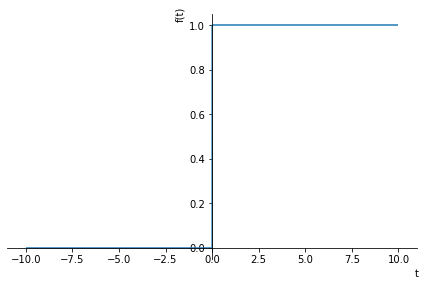

In [12]:
sp.plot(sp.Heaviside(t));

Mire la diferencia entre $f$ y la transformada inversa de lugar que obtuvimos, que contiene el paso unitario para forzarlo a cero antes de $t=0$.

In [13]:
invL(F).subs({a: 2})

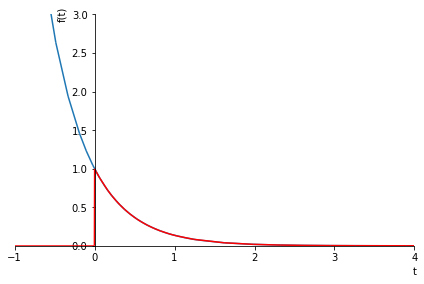

In [14]:
p = sp.plot(f.subs({a: 2}), invL(F).subs({a: 2}), 
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p[1].line_color
p.show()

A ver si podemos igualar las funciones en la tabla.

In [15]:
omega = sp.Symbol('omega', real=True)
n = sp.Symbol('n', integer=True)
exp = sp.exp
sin = sp.sin
cos = sp.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         (t**n)*(exp(-a*t))
         ]
functions

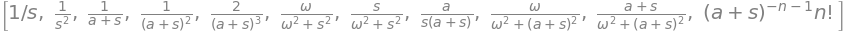

In [16]:
Fs = [L(f) for f in functions]
Fs

Podemos ver que la última no la escribo exactamente de la misma manera, pero que es lo misma función transformada de Laplace que figura en la table.

## Inversas más complicadas

¿Por qué la tabla no presenta funciones más complicadas? Debido a que las funciones racionales de orden superior se pueden escribir como sumas de funciones más simples mediante la aplicación de la expansión de fracciones parciales.

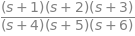

In [17]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))
F

Podemos hacer fracciones simples:

In [18]:
F.apart(s)

Incluso sympy puede beneficiarse con un poco de ayuda a veces. Cuando intentamos calcular el inverso de $F$ obtenemos una respuesta un tanto desagradable:

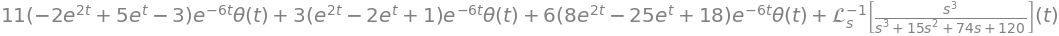

In [19]:
invL(F)

¿Tal vez se vea mejor si simplificamos?

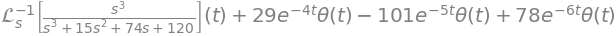

In [20]:
invL(F).simplify()

No, todavía presenta una transformada laplace "desconocida". Pero, si hacemos primero la expansión de fracciones parciales, obtenemos una respuesta limpia:

In [21]:
invL(F.apart(s))